In [118]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")

In [119]:
Auto=pd.read_csv('/Users/kristinzhang/Desktop/学习资料/2020 spring/sta160/project 1/Auto.csv')
Auto

,Sym,Nor_Los,make,Fue_Typ,aspiration,Num_of_Door,Bod_Sty,Dri_Whe,Eng_Loc,Whe_Bas,...,Eng_Siz,Fue_Sys,Bore,Stroke,Com_Rat,hp,Pea_Rpm,Cit_Mpg,Hig_Mpg,Price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
202,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
203,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
204,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [120]:
df_data = Auto.replace('?',np.NAN) 
df_data.isnull().sum()

Sym             0
Nor_Los        41
make            0
Fue_Typ         0
aspiration      0
Num_of_Door     2
Bod_Sty         0
Dri_Whe         0
Eng_Loc         0
Whe_Bas         0
Length          0
Width           0
height          0
Cur_Wei         0
Eng_Typ         0
Num_of_Cyl      0
Eng_Siz         0
Fue_Sys         0
Bore            4
Stroke          4
Com_Rat         0
hp              2
Pea_Rpm         2
Cit_Mpg         0
Hig_Mpg         0
Price           4
dtype: int64

In [121]:
#fill missing data of normalised-losses, 
#price, horsepower, peak-rpm, bore, stroke with the respective column mean

#Fill missing data category Number of doors with the mode of the column i.e. Four
df_temp = Auto[Auto['Nor_Los']!='?']
normalised_mean = df_temp['Nor_Los'].astype(int).mean()
Auto['Nor_Los'] = Auto['Nor_Los'].replace('?',normalised_mean).astype(int)

df_temp = Auto[Auto['Price']!='?']
normalised_mean = df_temp['Price'].astype(int).mean()
Auto['Price'] = Auto['Price'].replace('?',normalised_mean).astype(int)

df_temp = Auto[Auto['hp']!='?']
normalised_mean = df_temp['hp'].astype(int).mean()
Auto['hp'] = Auto['hp'].replace('?',normalised_mean).astype(int)

df_temp = Auto[Auto['Pea_Rpm']!='?']
normalised_mean = df_temp['Pea_Rpm'].astype(int).mean()
Auto['Pea_Rpm'] = Auto['Pea_Rpm'].replace('?',normalised_mean).astype(int)

df_temp = Auto[Auto['Bore']!='?']
normalised_mean = df_temp['Bore'].astype(float).mean()
Auto['Bore'] = Auto['Bore'].replace('?',normalised_mean).astype(float)

df_temp = Auto[Auto['Stroke']!='?']
normalised_mean = df_temp['Stroke'].astype(float).mean()
Auto['Stroke'] = Auto['Stroke'].replace('?',normalised_mean).astype(float)


Auto['Num_of_Door'] = Auto['Num_of_Door'].replace('?','four')
Auto.head()

,Sym,Nor_Los,make,Fue_Typ,aspiration,Num_of_Door,Bod_Sty,Dri_Whe,Eng_Loc,Whe_Bas,...,Eng_Siz,Fue_Sys,Bore,Stroke,Com_Rat,hp,Pea_Rpm,Cit_Mpg,Hig_Mpg,Price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


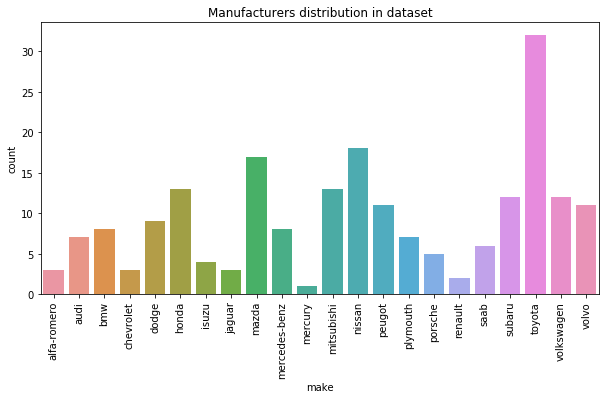

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(x='make', data=Auto)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()
#Top Selling Car Manufacturer is Toyota

The are several strongly correlating with each other columns, which could be combined together:


mpg = (city-mpg + highway-mpg) / 2



curb_weight is somehow based on linear sizes: length, width, wheel_base

In [123]:
data1=Auto.copy()
data1['mpg'] = (data1['Cit_Mpg'] + data1['Hig_Mpg']) / 2

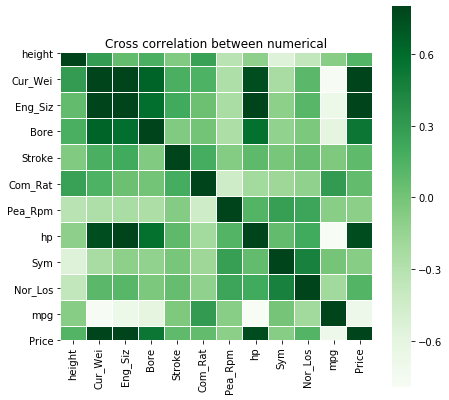

In [124]:
data2=data1.copy()
num_df=data2[['height','Cur_Wei','Eng_Siz','Bore','Stroke','Com_Rat',
            'Pea_Rpm','hp','Sym','Nor_Los','mpg','Price']]
plt.figure(figsize=(7, 7))
ax = sns.heatmap(num_df.corr(), vmax=.8, square=True, fmt='.2f',cmap="Greens",linecolor='white', linewidths=0.09)
plt.title('Cross correlation between numerical')
plt.show()

In [125]:
stats.pearsonr(Auto['height'], Auto['Price'])

(0.1343877957091601, 0.05471931679041278)

In [126]:
stats.pearsonr(Auto['Cur_Wei'], Auto['Price'])

(0.8208247364886393, 2.8663275083502043e-51)

In [127]:
stats.pearsonr(Auto['Eng_Siz'], Auto['Price'])

(0.8617522313557833, 9.66974309680653e-62)

In [128]:
stats.pearsonr(Auto['Bore'], Auto['Price'])

(0.5323000757708254, 2.139812289831734e-16)

In [129]:
stats.pearsonr(Auto['Stroke'], Auto['Price'])

(0.08209537049469544, 0.2419141372709262)

In [130]:
stats.pearsonr(Auto['Com_Rat'], Auto['Price'])

(0.07099045143780537, 0.31178188611196345)

In [131]:
stats.pearsonr(Auto['hp'], Auto['Price'])

(0.7579456217935241, 1.591033244659641e-39)

In [132]:
stats.pearsonr(Auto['Pea_Rpm'], Auto['Price'])

(-0.10085084127381386, 0.15020557409046376)

In [133]:
stats.pearsonr(data2['mpg'], Auto['Price'])

(-0.6842007110736521, 1.2003440437917137e-29)

In [134]:
stats.pearsonr(Auto['Sym'], Auto['Price'])

(-0.08220135087401062, 0.24130482805344847)

In [135]:
stats.pearsonr(Auto['Nor_Los'], Auto['Price'])

(0.13399873429239528, 0.05543057826382352)

'make','fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'

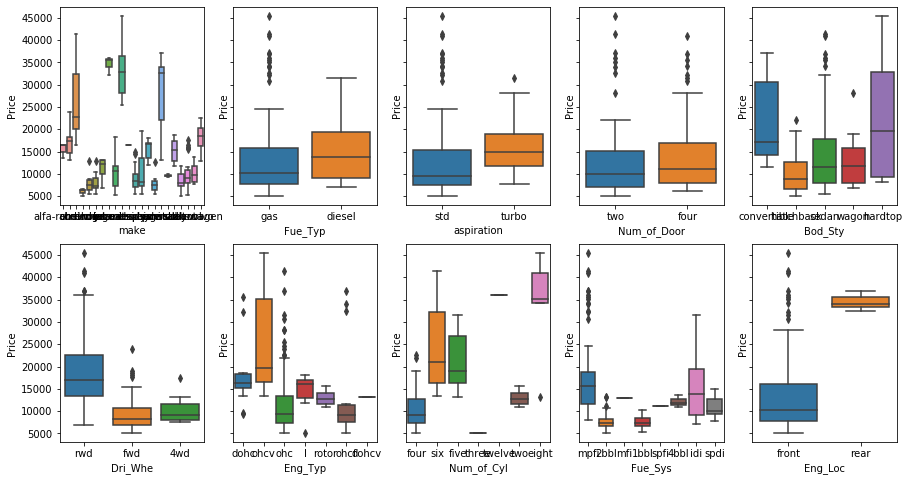

In [136]:
f, axes = plt.subplots(2, 5, sharey=True, figsize=(15, 8))
sns.boxplot(x="make", y="Price", data=Auto, ax=axes[0,0])
sns.boxplot(x="Fue_Typ", y="Price", data=Auto,ax=axes[0,1])
sns.boxplot(x="aspiration", y="Price", data=Auto,ax=axes[0,2])
sns.boxplot(x="Num_of_Door", y="Price", data=Auto,ax=axes[0,3])
sns.boxplot(x="Bod_Sty", y="Price", data=Auto,ax=axes[0,4])
sns.boxplot(x="Dri_Whe", y="Price", data=Auto,ax=axes[1,0])
sns.boxplot(x="Eng_Typ", y="Price", data=Auto,ax=axes[1,1])
sns.boxplot(x="Num_of_Cyl", y="Price", data=Auto,ax=axes[1,2])
sns.boxplot(x="Fue_Sys", y="Price", data=Auto,ax=axes[1,3])
sns.boxplot(x="Eng_Loc", y="Price", data=Auto,ax=axes[1,4])

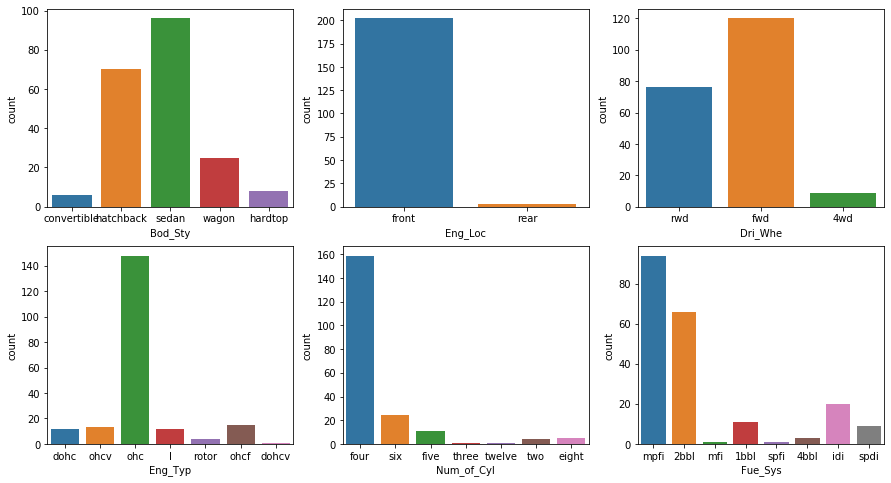

In [137]:
#Categorical features distributions:
categorical = ['make', 'Bod_Sty', 'Eng_Loc',
               'Dri_Whe', 'Eng_Typ', 'Num_of_Cyl', 'Fue_Sys']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=Auto, ax=ax)
#The dataset is quiet unbalanced in body_style, 
#engine_location, engine_type, num_of_cylinders and fuel_system. 
#We can combine rare values to add more balance to the data. 
#Also there very few examples of vehicles with rear engine, 
#so we won't use this feature in the model.

In [138]:
#drive_wheels_counts = Auto['Dri_Whe'].value_counts().to_frame()
#drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'},inplace=True)
#drive_wheels_counts

In [139]:
Auto_gptest=Auto[['Dri_Whe','Price']]
grouped_test2=Auto_gptest[['Dri_Whe', 'Price']].groupby(['Dri_Whe'])
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['Price'], 
                              grouped_test2.get_group('rwd')['Price'], 
                              grouped_test2.get_group('4wd')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.50368965539572 , P = 3.5392223627637895e-23


Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base


Categorical variables:

Drive-wheels

In [140]:
newdata=data2[['hp','Cur_Wei','Eng_Siz','mpg','Dri_Whe','Price']]
newdata

,hp,Cur_Wei,Eng_Siz,mpg,Dri_Whe,Price
1,111,2548,130,24.0,rwd,13495
2,111,2548,130,24.0,rwd,16500
3,154,2823,152,22.5,rwd,16500
4,102,2337,109,27.0,fwd,13950
5,115,2824,136,20.0,4wd,17450
...,...,...,...,...,...,...
201,114,2952,141,25.5,rwd,16845
202,160,3049,141,22.0,rwd,19045
203,134,3012,173,20.5,rwd,21485
204,106,3217,145,26.5,rwd,22470


In [141]:
Dri_Whe_code = {'rwd': 0,'fwd':2, '4wd': 4}
newdata['Dri_Whe'] = newdata['Dri_Whe'].map(Dri_Whe_code)

In [142]:
lm = LinearRegression()
P = newdata[['hp','Cur_Wei','Eng_Siz','mpg']]
#Fit the linear model
lm.fit(Z, Auto['Price'])
print(lm.intercept_)
print(lm.coef_)

-9595.302575774049
[ 17.51410443   3.87610928 101.29320271 -63.74693048]


In [143]:
import pandas as pd
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif
get_vif(exogs=P, data=newdata)

,VIF,Tolerance
hp,4.460783,0.224176
Cur_Wei,5.300314,0.188668
Eng_Siz,5.298836,0.188721
mpg,3.804192,0.262868


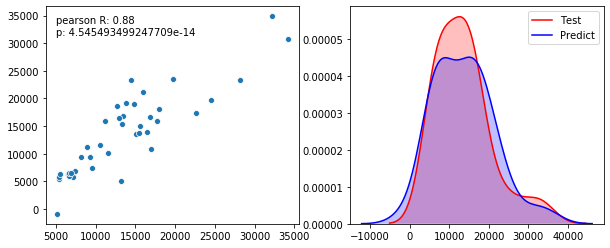

In [144]:
import seaborn as sb
df = df._get_numeric_data()
y = df['Price'].values
x = P
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
x= MinMaxScaler().fit(x).transform(x)
# Split dataset to train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
# Predict on test set
y_pred = regressor.predict(x_test)
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [145]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 12712460.351605985
Mean absolute error: 2687.0481787282806
R2 score: 0.7394477701057496


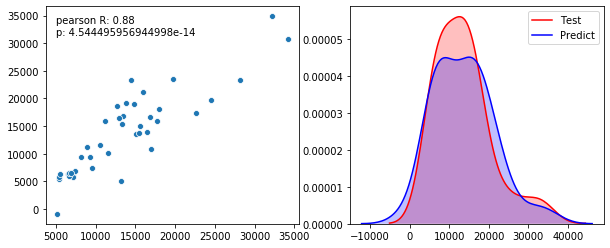

In [146]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.05, normalize = True)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [147]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 12710392.539261268
Mean absolute error: 2686.8350414259894
R2 score: 0.7394901516040999


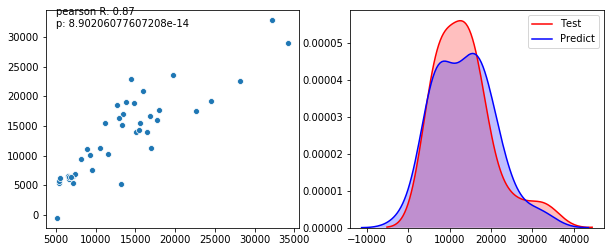

In [148]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet(alpha=0.01, l1_ratio=0.5, normalize=False)
enet_model.fit(x_train, y_train)
y_pred = enet_model.predict(x_test)
r = scipy.stats.pearsonr(y_test, y_pred)
pearson_r = str(round(r[0],2))
pearson_p = str(r[1])

plt.figure(figsize= (10,4))
ax1 = plt.subplot(121)
sb.scatterplot(y_test, y_pred)
plt.text(5000, 35000, 'pearson R: '+ pearson_r + '\np: ' + pearson_p, va = 'top')

ax2 = plt.subplot(122)
sb.kdeplot(y_test, shade=True, color="r", legend=True, label = 'Test')
sb.kdeplot(y_pred, shade=True, color="b", legend=True, label = 'Predict')
plt.legend()

In [149]:
# Mean squared error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
print('Mean squared error:', MSE)

# Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_pred)
print('Mean absolute error:', MAE)

# R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Mean squared error: 12388972.693225805
Mean absolute error: 2620.2393642476623
R2 score: 0.7460779131624851
